In [60]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openml
import seaborn as sns

In [61]:
df_eval = pd.read_csv("similarity_evaluation_pfn.csv")
df_eval = df_eval.drop("Unnamed: 0", axis=1)

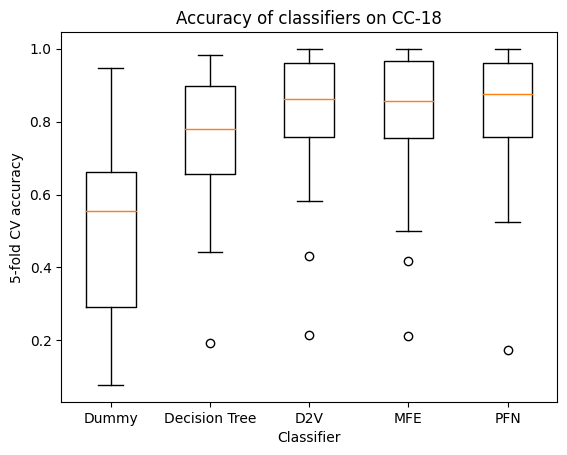

In [62]:
fig, ax = plt.subplots()

res_arr = [df_eval[col].dropna() for col in ['dummy_clf', 'dt_clf', 'd2v_clf', 'mfe_clf','pfn_clf']]
ax.boxplot(res_arr)
ax.set_xticklabels(['Dummy', 'Decision Tree', 'D2V', 'MFE', 'PFN'])
ax.set_ylabel("5-fold CV accuracy")
ax.set_xlabel("Classifier")
ax.set_title("Accuracy of classifiers on CC-18");
fig.savefig("plots/accuracy.png", dpi=300)

In [63]:
df_eval['d2v_diff_dummy'] = df_eval["d2v_clf"]-df_eval["dummy_clf"]
df_eval['mfe_diff_dummy'] = df_eval["mfe_clf"]-df_eval["dummy_clf"]
df_eval['pfn_diff_dummy'] = df_eval["pfn_clf"]-df_eval["dummy_clf"]

df_eval['d2v_diff_dt'] = df_eval["d2v_clf"]-df_eval["dt_clf"]
df_eval['mfe_diff_dt'] = df_eval["mfe_clf"]-df_eval["dt_clf"]
df_eval['pfn_diff_dt'] = df_eval["pfn_clf"]-df_eval["dt_clf"]

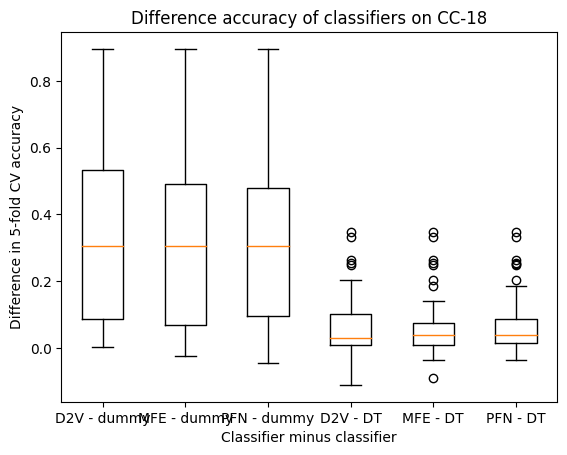

In [64]:
fig, ax = plt.subplots()

res_arr = [df_eval[col].dropna() for col in ['d2v_diff_dummy', 'mfe_diff_dummy','pfn_diff_dummy', 'd2v_diff_dt','mfe_diff_dt', 'pfn_diff_dt']]
ax.boxplot(res_arr)
ax.set_xticklabels(['d2v_diff_dummy', 'mfe_diff_dummy','pfn_diff_dummy', 'd2v_diff_dt','mfe_diff_dt', 'pfn_diff_dt'])

ax.set_xticklabels(['D2V - dummy', 'MFE - dummy','PFN - dummy', 'D2V - DT', 'MFE - DT', 'PFN - DT'])
ax.set_ylabel("Difference in 5-fold CV accuracy")
ax.set_xlabel("Classifier minus classifier")
ax.set_title("Difference accuracy of classifiers on CC-18");
fig.savefig("plots/accuracy_diff.png", dpi=300)

In [114]:
x = np.round(df_eval.describe()[['dummy_clf', 'dt_clf', 'd2v_clf', 'mfe_clf', 'pfn_clf']], 3).loc[['mean', '50%', 'std'],:].style
style = lambda z: display(z.style.background_gradient(axis=1, cmap="Reds").format(formatter=lambda x: f'{x:.2%}'))

In [115]:
style(np.round(df_eval.describe()[['dummy_clf', 'dt_clf', 'd2v_clf', 'mfe_clf', 'pfn_clf']], 3).loc[['mean', '50%', 'std'],:])
style(np.round(df_eval[~np.isnan(df_eval['mfe_clf'])].describe()[['dummy_clf', 'dt_clf', 'd2v_clf', 'mfe_clf','pfn_clf']], 3).loc[['mean', '50%', 'std'],:])

,dummy_clf,dt_clf,d2v_clf,mfe_clf,pfn_clf
mean,50.00%,76.10%,82.90%,82.90%,83.60%
50%,55.50%,77.90%,86.10%,85.70%,87.70%
std,26.80%,16.60%,16.40%,17.00%,16.00%


,dummy_clf,dt_clf,d2v_clf,mfe_clf,pfn_clf
mean,49.70%,76.30%,82.90%,82.90%,83.80%
50%,55.50%,78.70%,86.10%,85.70%,88.10%
std,27.00%,16.80%,16.60%,17.00%,16.20%


In [70]:
#print(np.round(df_eval.describe()[['dummy_clf', 'dt_clf', 'd2v_clf', 'mfe_clf']], 3).loc[['mean', '50%', 'std'],:].to_latex())
#print(np.round(df_eval[~np.isnan(df_eval['mfe_clf'])].describe()[['dummy_clf', 'dt_clf', 'd2v_clf', 'mfe_clf']], 3).loc[['mean', '50%', 'std'],:].to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  dummy\_clf &  dt\_clf &  d2v\_clf &  mfe\_clf \\
\midrule
mean &      0.500 &   0.761 &    0.829 &    0.829 \\
50\%  &      0.555 &   0.779 &    0.861 &    0.857 \\
std  &      0.268 &   0.166 &    0.164 &    0.170 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrr}
\toprule
{} &  dummy\_clf &  dt\_clf &  d2v\_clf &  mfe\_clf \\
\midrule
mean &      0.497 &   0.763 &    0.829 &    0.829 \\
50\%  &      0.555 &   0.787 &    0.861 &    0.857 \\
std  &      0.270 &   0.168 &    0.166 &    0.170 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_4862/3570059852.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(np.round(df_eval.describe()[['dummy_clf', 'dt_clf', 'd2v_clf', 'mfe_clf']], 3).loc[['mean', '50%', 'std'],:].to_latex())
/tmp/ipykernel_4862/3570059852.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(np.round(df_eval[~np.isnan(df_eval['mfe_clf'])].describe()[['dummy_clf', 'dt_clf', 'd2v_clf', 'mfe_clf']], 3).loc[['mean', '50%', 'std'],:].to_latex())


In [66]:
def get_meta_data(row, kind="num_features"):
    
    dataset = openml.datasets.get_dataset(row['data_id'])
    
    if kind=='num_features':
        return len(dataset.features.values())
    
    elif kind=='num_rows':
        return len(dataset.get_data()[0])
    
    elif kind=='prop_cat':
        categorical = dataset.get_data()[2]
        return sum(categorical) / len(categorical)
    
    elif kind=='num_classes':
        return len(np.unique(dataset.get_data(target=dataset.default_target_attribute)[1]))
    
    else:
        return None
    
df = df_eval.copy(deep=True)
df['num_feats'] = df.apply(lambda x: get_meta_data(x, kind="num_features"), axis=1)
df['num_rows'] = df.apply(lambda x: get_meta_data(x, kind="num_rows"), axis=1)
df['prop_cat'] = df.apply(lambda x: get_meta_data(x, kind="prop_cat"), axis=1)
df['num_classes'] = df.apply(lambda x: get_meta_data(x, kind="num_classes"), axis=1)
df = df.rename({'d2v_diff_dt':'D2V-DT', 'mfe_diff_dt':'MFE-DT','pfn_diff_dt':'PFN-DT',
       'num_feats':'number of features', 'num_rows':'number of rows', 'prop_cat':'proportion categorical', 'num_classes':'number of classes'}, axis=1)

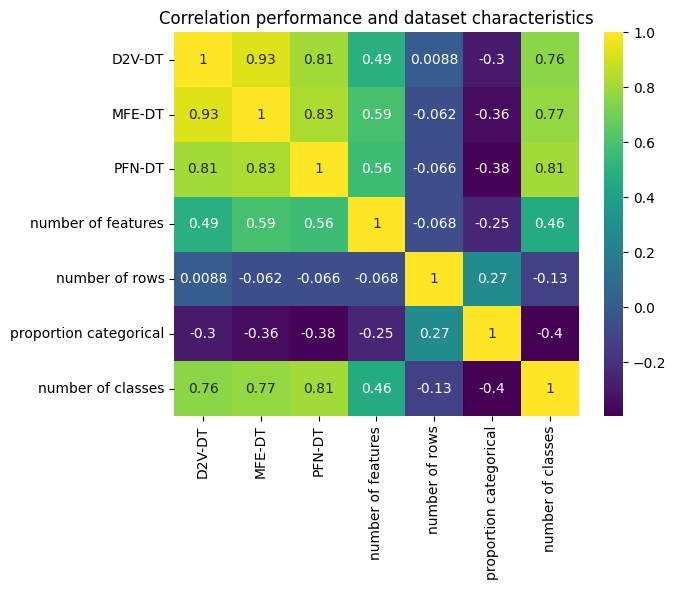

In [68]:
fig, ax = plt.subplots(figsize=(7,6))#figsize=(10,10))
hm = sns.heatmap(df[['D2V-DT', 'MFE-DT','PFN-DT',
       'number of features', 'number of rows', 'proportion categorical',
       'number of classes']].corr(), annot = True, ax=ax, cmap='viridis')

#hm.set(xlabel='\nIRIS Flower Details', ylabel='IRIS Flower Details\t', title = "Correlation matrix of IRIS data\n")

ax.set_title("Correlation performance and dataset characteristics")
plt.tight_layout()
fig.savefig("plots/corr_plot.png", dpi=300)

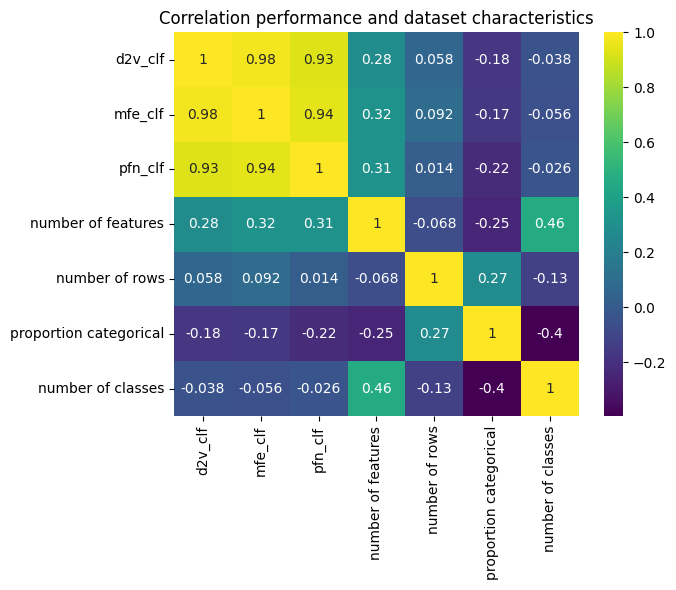

In [69]:
fig, ax = plt.subplots(figsize=(7,6))#figsize=(10,10))
hm = sns.heatmap(df[['d2v_clf', 'mfe_clf','pfn_clf',
       'number of features', 'number of rows', 'proportion categorical',
       'number of classes']].corr(), annot = True, ax=ax, cmap='viridis')

#hm.set(xlabel='\nIRIS Flower Details', ylabel='IRIS Flower Details\t', title = "Correlation matrix of IRIS data\n")

ax.set_title("Correlation performance and dataset characteristics")
plt.tight_layout()
fig.savefig("plots/corr_plot.png", dpi=300)